In [5]:
# 📌 Import libraries
import pandas as pd

# 📌 Load the dataset
file_path = r"C:\Users\Shivakrishna D\Downloads\StudentsPerformance.csv"
df = pd.read_csv(file_path)

# 📌 Show first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# 📌 Get basic info about the dataset
print("\nDataset Info:")
df.info()

# 📌 Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# 📌 Clean column names (optional but useful)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# 📌 Display cleaned column names
print("\nCleaned column names:")
print(df.columns)

# 📌 Save cleaned version (optional)
# df.to_csv("Cleaned_StudentsPerformance.csv", index=False)


First 5 rows of the dataset:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Missing values in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                

Matplotlib is building the font cache; this may take a moment.


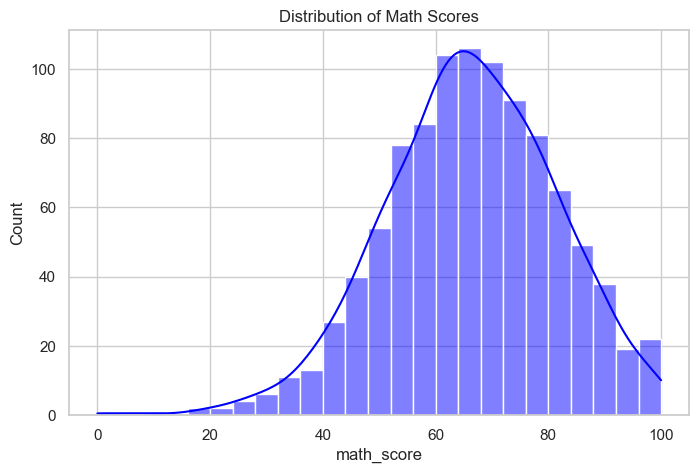

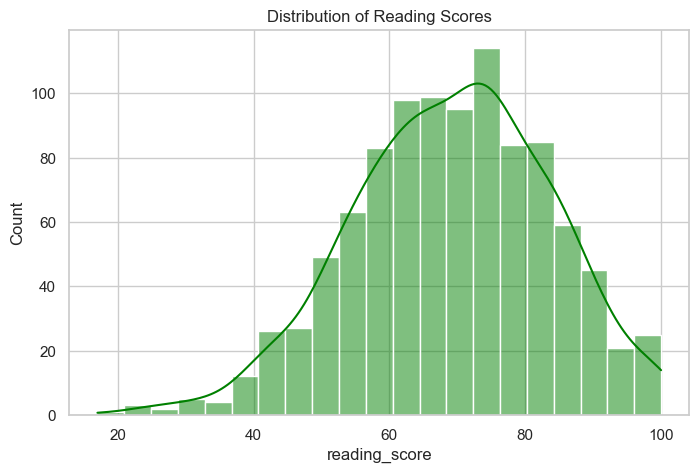

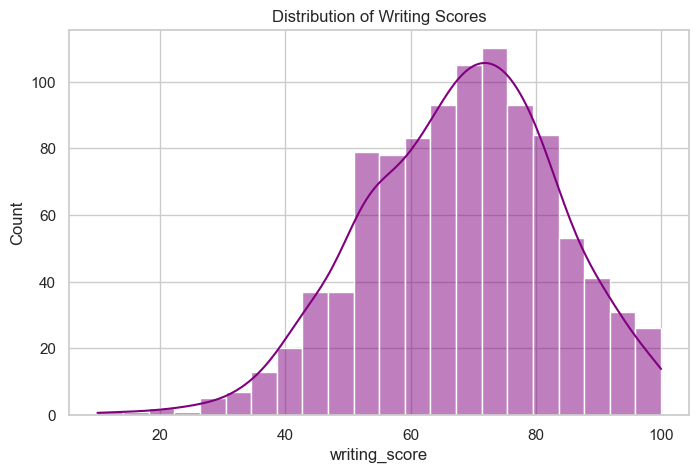

C:\Users\Shivakrishna D\AppData\Local\Temp\ipykernel_10136\3678387369.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


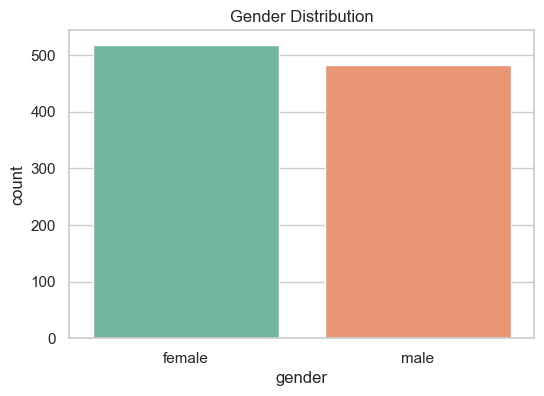

C:\Users\Shivakrishna D\AppData\Local\Temp\ipykernel_10136\3678387369.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math_score', data=df, palette='Set3')


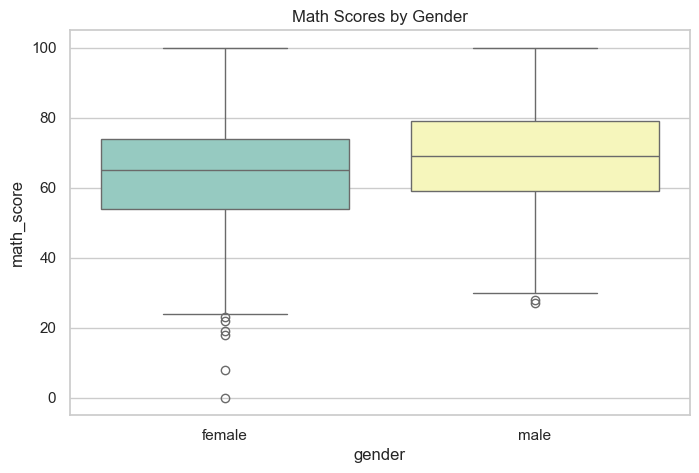

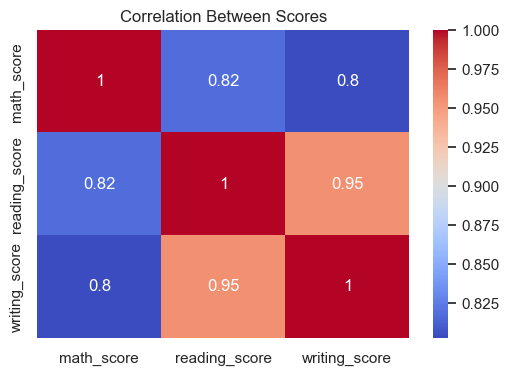

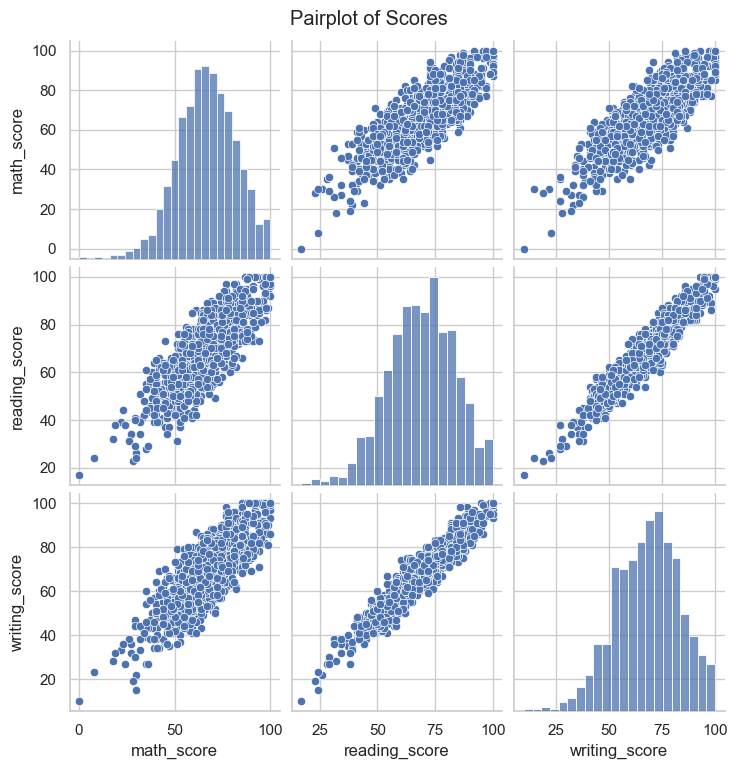

In [4]:
# 📌 Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Set visual style
sns.set(style="whitegrid")
%matplotlib inline

# 📌 Load the dataset (use cleaned version or clean again here)
file_path = r"C:\Users\Shivakrishna D\Downloads\StudentsPerformance.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# === EDA START ===

# 1. Histogram of math scores
plt.figure(figsize=(8, 5))
sns.histplot(df['math_score'], kde=True, color='blue')
plt.title("Distribution of Math Scores")
plt.show()

# 2. Histogram of reading scores
plt.figure(figsize=(8, 5))
sns.histplot(df['reading_score'], kde=True, color='green')
plt.title("Distribution of Reading Scores")
plt.show()

# 3. Histogram of writing scores
plt.figure(figsize=(8, 5))
sns.histplot(df['writing_score'], kde=True, color='purple')
plt.title("Distribution of Writing Scores")
plt.show()

# 4. Countplot of gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()

# 5. Boxplot of math scores by gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='math_score', data=df, palette='Set3')
plt.title("Math Scores by Gender")
plt.show()

# 6. Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Scores")
plt.show()

# 7. Pairplot of all scores
sns.pairplot(df[['math_score', 'reading_score', 'writing_score']])
plt.suptitle("Pairplot of Scores", y=1.02)
plt.show()


In [ ]:
## 🎓 Student Performance Classification - Pass or Fail Prediction

In this notebook, we'll predict whether a student passes or fails based on their scores and other features using Logistic Regression and Random Forest.


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
file_path = r"C:\Users\Shivakrishna D\Downloads\StudentsPerformance.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
# Define "pass" as scoring >= 40 in all subjects
df['pass'] = np.where(
    (df['math_score'] >= 40) & 
    (df['reading_score'] >= 40) & 
    (df['writing_score'] >= 40), 
    1, 0)

df[['math_score', 'reading_score', 'writing_score', 'pass']].head()

,math_score,reading_score,writing_score,pass
0,72,72,74,1
1,69,90,88,1
2,90,95,93,1
3,47,57,44,1
4,76,78,75,1


In [13]:
# Encode categorical features using LabelEncoder
label_enc = LabelEncoder()

for col in ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']:
    df[col] = label_enc.fit_transform(df[col])

df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pass
0,0,1,1,1,1,72,72,74,1
1,0,2,4,1,0,69,90,88,1
2,0,1,3,1,1,90,95,93,1
3,1,0,0,0,1,47,57,44,1
4,1,2,4,1,1,76,78,75,1


In [14]:
# Define features and target
X = df.drop(columns=['pass'])
y = df['pass']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 800
Testing samples: 200


In [15]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

In [16]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

In [17]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"🔹 {model_name} Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate Logistic Regression
evaluate_model(y_test, log_preds, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, rf_preds, "Random Forest")

🔹 Logistic Regression Accuracy: 0.9850
Confusion Matrix:
[[ 11   2]
 [  1 186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.99      0.99      0.99       187

    accuracy                           0.98       200
   macro avg       0.95      0.92      0.94       200
weighted avg       0.98      0.98      0.98       200

🔹 Random Forest Accuracy: 1.0000
Confusion Matrix:
[[ 13   0]
 [  0 187]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00       187

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



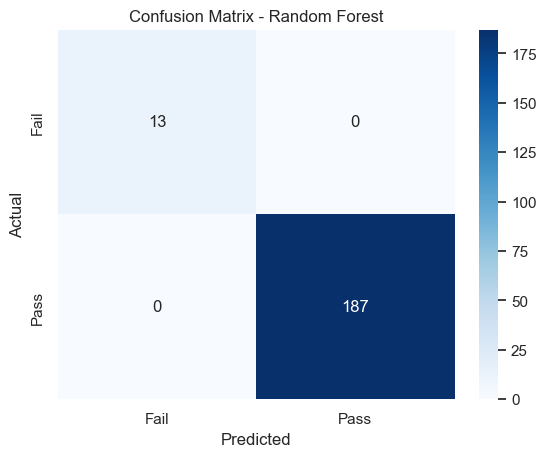

In [18]:
# Plot confusion matrix for Random Forest
cm = confusion_matrix(y_test, rf_preds)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()